Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.regularizers import l2

from keras import optimizers

from tensorflow.keras.datasets import cifar10

In [3]:
# ## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

# #Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# # Defining the path for train and test images
# ## Todo: Update the paths of the train and test dataset
# data_dir_train = pathlib.Path(r"/content/gdrive/MyDrive/CNN/Train")
# data_dir_test = pathlib.Path(r"/content/gdrive/MyDrive/CNN/Test")

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"E:\Upgrad\CNN\Train")
data_dir_test = pathlib.Path(r'E:\Upgrad\CNN\Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [13]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2239 files belonging to 9 classes.


In [14]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 118 files belonging to 9 classes.


In [15]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

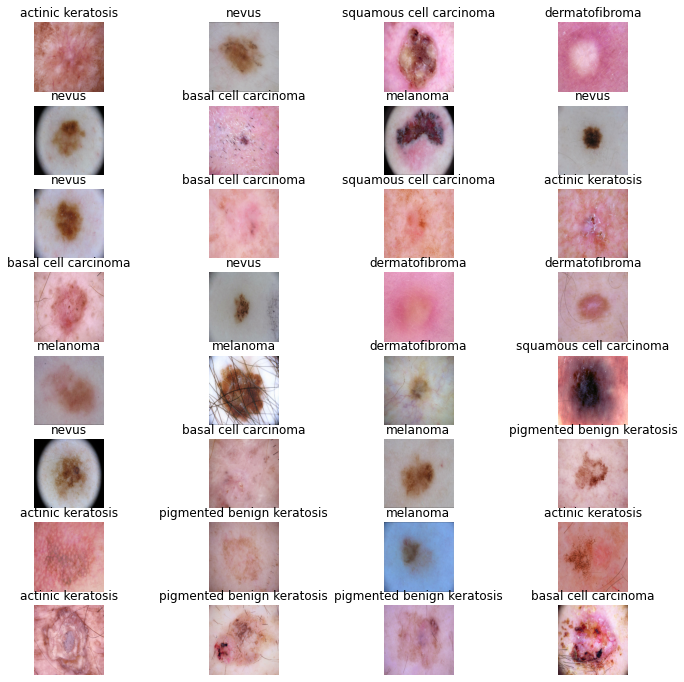

In [135]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(12, 12))
class_names = val_ds.class_names
for images, labels in val_ds.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [103]:
### Your code goes here

rescale = Rescaling(scale=1.0/255)
rescaled_train_dataset = train_ds.map(lambda image,label:(rescale(image),label))
rescaled_val_dataset = val_ds.map(lambda image,label:(rescale(image),label))

num_classes = 9

# model = Sequential()
# # model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
# #                   input_shape=(180,180,3), kernel_initializer='he_normal'))
# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(180,180,3), activation = 'relu'))

# model.add(Conv2D(32, (3,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(64, (3,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(128, (3,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # model.add(Conv2D(256, (3,3)))
# # model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# # model.add(Dense(1000))
# # model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(9, activation='softmax'))
# model.add(BatchNormalization())
# # model.add(Activation('softmax'))




model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected

# softmax layer
model.add(Dense(num_classes, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [104]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [105]:
# View the summary of all layers
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_78 (Conv2D)          (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 88, 88, 64)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 495616)            0         
                                                                 
 dense_42 (Dense)            (None, 128)               63438976  
                                                                 
 dense_43 (Dense)            (None, 9)                 1161      
                                                     

### Train the model

In [106]:
epochs = 20
history = model.fit(
  rescaled_train_dataset,
  validation_data=rescaled_val_dataset,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 6s 77ms/step - loss: 3.1934 - accuracy: 0.2970 - val_loss: 2.7273 - val_accuracy: 0.3051
Epoch 2/20
70/70 [==============================] - 5s 75ms/step - loss: 1.5489 - accuracy: 0.4707 - val_loss: 2.2624 - val_accuracy: 0.3475
Epoch 3/20
70/70 [==============================] - 5s 76ms/step - loss: 1.3633 - accuracy: 0.5109 - val_loss: 2.1943 - val_accuracy: 0.3051
Epoch 4/20
70/70 [==============================] - 5s 75ms/step - loss: 1.2235 - accuracy: 0.5748 - val_loss: 2.3571 - val_accuracy: 0.3559
Epoch 5/20
70/70 [==============================] - 5s 74ms/step - loss: 1.1016 - accuracy: 0.6168 - val_loss: 2.8837 - val_accuracy: 0.2966
Epoch 6/20
70/70 [==============================] - 5s 74ms/step - loss: 0.9486 - accuracy: 0.6950 - val_loss: 2.6070 - val_accuracy: 0.3051
Epoch 7/20
70/70 [==============================] - 5s 77ms/step - loss: 0.7922 - accuracy: 0.7302 - val_loss: 3.6976 - val_accuracy: 0.3051
Epoch 8/20
70

### Visualizing training results

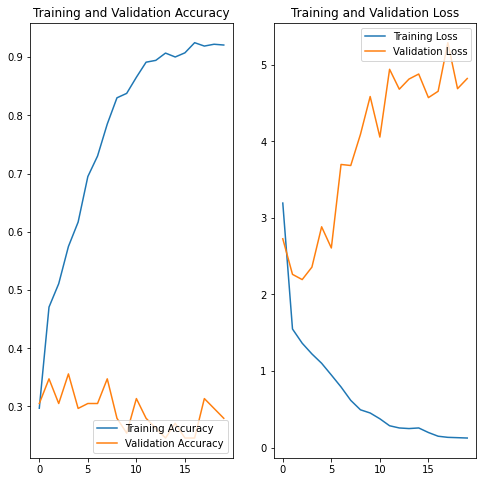

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [113]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)

# # second conv layer
# model.add(Conv2D(64, kernel_size=(3, 3), 
#                  activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# # flatten and put a fully connected layer
# model.add(Flatten())
# model.add(Dense(128, activation='relu')) # fully connected
# model.add(BatchNormalization())
# model.add(Dropout(0.75))

# # softmax layer
# model.add(Dense(9, activation='softmax'))

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Model is overfitting the train data as its accuracy increases substantially but test accuracy does not improve significantly
- The validation loss for test data also increases significantly

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



In [118]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(5, 5), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# third conv layer
model.add(Conv2D(128, kernel_size=(5, 5), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# fourth conv layer
model.add(Conv2D(256, kernel_size=(5, 5), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))

model.add(Conv2D(512, kernel_size=(5, 5), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024, kernel_size=(5, 5), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(2048, kernel_regularizer = l2(0.01), activation='relu')) # fully connected
model.add(Dropout(0.65))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

In [119]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [120]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 176, 176, 32)      2432      
                                                                 
 conv2d_86 (Conv2D)          (None, 172, 172, 64)      51264     
                                                                 
 batch_normalization_41 (Bat  (None, 172, 172, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 86, 86, 64)       0         
 g2D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 86, 86, 64)        0         
                                                                 
 conv2d_87 (Conv2D)          (None, 82, 82, 128)     

### Compiling the model

In [121]:
epochs = 50
history = model.fit(
  rescaled_train_dataset,
  validation_data=rescaled_val_dataset,
  epochs=epochs
)

Epoch 1/50
70/70 [==============================] - 15s 197ms/step - loss: 15.3364 - accuracy: 0.3122 - val_loss: 16.0294 - val_accuracy: 0.1271
Epoch 2/50
70/70 [==============================] - 14s 196ms/step - loss: 11.4768 - accuracy: 0.3667 - val_loss: 11.0018 - val_accuracy: 0.0932
Epoch 3/50
70/70 [==============================] - 14s 195ms/step - loss: 8.5770 - accuracy: 0.3930 - val_loss: 8.7706 - val_accuracy: 0.1695
Epoch 4/50
70/70 [==============================] - 14s 193ms/step - loss: 6.5388 - accuracy: 0.4243 - val_loss: 6.2998 - val_accuracy: 0.1780
Epoch 5/50
70/70 [==============================] - 14s 195ms/step - loss: 4.9990 - accuracy: 0.4444 - val_loss: 5.6407 - val_accuracy: 0.2288
Epoch 6/50
70/70 [==============================] - 14s 193ms/step - loss: 3.8496 - accuracy: 0.4828 - val_loss: 6.3106 - val_accuracy: 0.1610
Epoch 7/50
70/70 [==============================] - 14s 196ms/step - loss: 3.1249 - accuracy: 0.4989 - val_loss: 7.5553 - val_accuracy: 0.

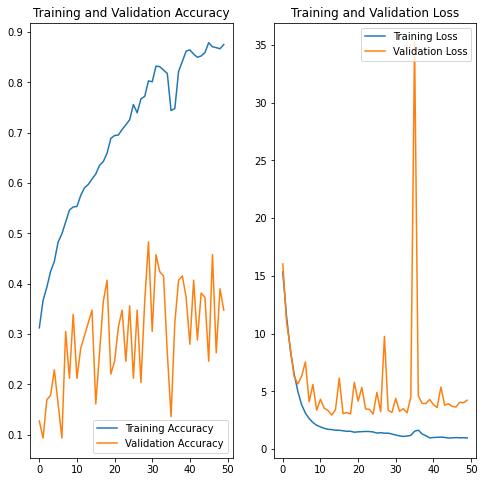

In [122]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes hereacc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo:
### Create the model, compile and train the model


### Training the model

### Visualizing the results

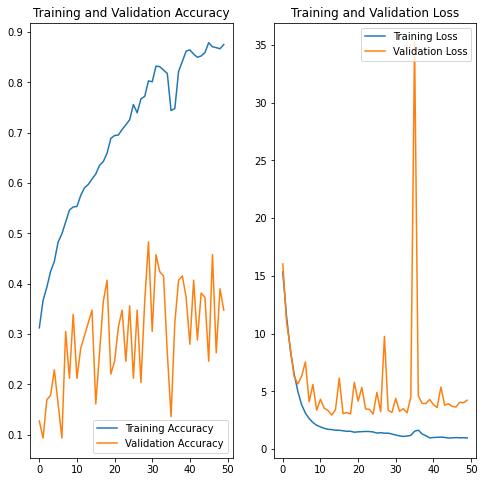

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

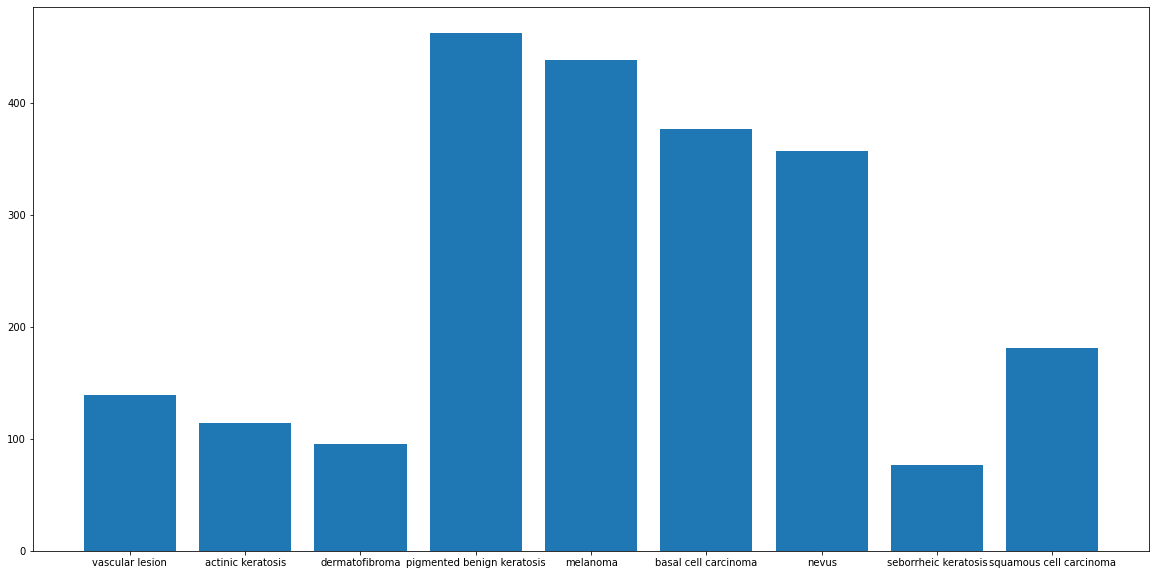

In [209]:
import numpy
from collections import Counter
names = {i:j for i,j in enumerate(train_ds.class_names)}
samples = Counter([i for j in [list(numpy.array(i)) for j,i in train_ds] for i in j])
dict_class = {names[key]:val for key, val in samples.items()}
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.bar(dict_class.keys(), dict_class.values())

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? - seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [7]:
!pip install Augmentor

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=5b4bf488d0852c35f72442f3a3215d6cbc8abc5b8965c962572d3add3bd275cb
  Stored in directory: c:\users\ashis\appdata\local\pip\cache\wheels\6e\9c\ed\4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built future


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [16]:
path_to_training_dataset=r"E:/Upgrad/CNN/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22F864A9CC0>: 100%|█| 500/500 [00:00<00:


Initialised with 376 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F8631AB38>: 100%|█| 500/500 [00:01<00:00, 470.42 Samples


Initialised with 95 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F85C1EF60>: 100%|█| 500/500 [00:00<00:00, 585.63 Samples


Initialised with 438 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22F862DBAC8>: 100%|█| 500/500 [00:03<00:00, 129.42 Sample


Initialised with 357 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x22F85C03278>: 100%|█| 500/500 [00:03<00:


Initialised with 462 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F860D70B8>: 100%|█| 500/500 [00:01<00:00, 395.90 Samples


Initialised with 77 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22F85BBF898>: 100%|█| 500/500 [00:01<00:00, 277.06 Sample


Initialised with 181 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22F8648A550>: 100%|█| 500/500 [00:00<00:00, 532.30 Samples


Initialised with 139 image(s) found.
Output directory set to E:/Upgrad/CNN/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22F86265748>: 100%|█| 500/500 [00:00<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [17]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [18]:
data_dir_train

WindowsPath('E:/Upgrad/CNN/Train')

In [19]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [20]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [21]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_old = dict(zip(path_list, lesion_list_old))

In [22]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
new_df2 = original_df.append(new_df)

In [23]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [24]:
new_df['Label'].value_counts()

basal cell carcinoma          500
vascular lesion               500
squamous cell carcinoma       500
actinic keratosis             500
seborrheic keratosis          500
nevus                         500
melanoma                      500
dermatofibroma                500
pigmented benign keratosis    500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [25]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [30]:
data_dir_train=r"E:\Upgrad\CNN\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [31]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
### Your code goes here
rescale = Rescaling(scale=1.0/255)
rescaled_train_dataset = train_ds.map(lambda image,label:(rescale(image),label))
rescaled_val_dataset = val_ds.map(lambda image,label:(rescale(image),label))

num_classes = 9

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(180,180,3))) # input shape = (img_rows, img_cols, 1)

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
# model.add(BatchNormalization())
model.add(Dropout(0.75))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
epochs = 30
history = model.fit(
  rescaled_train_dataset,
  validation_data=rescaled_val_dataset,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 177s 1s/step - loss: 2.4729 - accuracy: 0.2094 - val_loss: 2.0535 - val_accuracy: 0.2554
Epoch 2/30
169/169 [==============================] - 176s 1s/step - loss: 1.9521 - accuracy: 0.2841 - val_loss: 1.8396 - val_accuracy: 0.3244
Epoch 3/30
169/169 [==============================] - 176s 1s/step - loss: 1.8177 - accuracy: 0.3284 - val_loss: 1.6921 - val_accuracy: 0.3534
Epoch 4/30
169/169 [==============================] - 181s 1s/step - loss: 1.7452 - accuracy: 0.3435 - val_loss: 1.5498 - val_accuracy: 0.4098
Epoch 5/30
169/169 [==============================] - 179s 1s/step - loss: 1.6090 - accuracy: 0.3997 - val_loss: 1.4390 - val_accuracy: 0.4477
Epoch 6/30
169/169 [==============================] - 181s 1s/step - loss: 1.5508 - accuracy: 0.4130 - val_loss: 1.5046 - val_accuracy: 0.4195
Epoch 7/30
169/169 [==============================] - 179s 1s/step - loss: 1.4977 - accuracy: 0.4401 - val_loss: 1.5944 - val_accuracy: 0.4076

#### **Todo:**  Visualize the model results

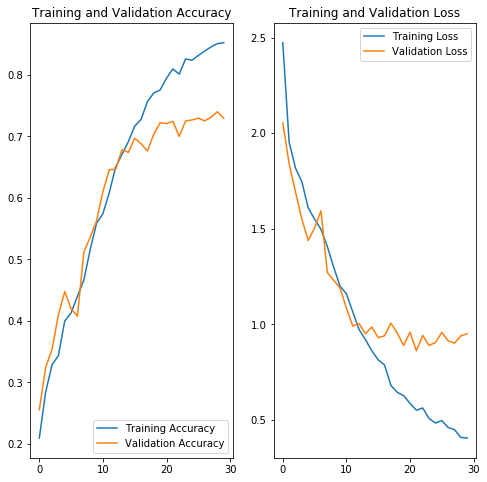

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
Yes, model results after rebalance are significantly better